In [1]:
!pip install -q -U --pre pycaret

In [2]:
pip install pycaret[nlp]

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install spacy

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
import re

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

import string

import spacy
from tqdm.auto import tqdm
import time

In [5]:
data = pd.read_csv('tripadvisor_hotel_reviews.csv')
data

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [6]:
!python -m spacy download en_core_web_sm

     -------------------------------------- 12.8/12.8 MB 673.1 kB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [7]:
# Load the English NLP model
nlp = spacy.load('en_core_web_sm')

# Define stop words
stop_words = spacy.lang.en.stop_words.STOP_WORDS

In [8]:
nlp

In [9]:
def preprocess_text(text):
    # Parse the text with Spacy
    doc = nlp(text)
    
    # Lemmatize the tokens and remove stop words
    lemmas = [token.lemma_.lower() for token in doc if not token.is_stop]
    
    # Join the lemmas back into a string and return it
    return " ".join(lemmas)

In [10]:
%%time

tqdm.pandas()

data['Review'] = data['Review'].progress_apply(preprocess_text)

  0%|          | 0/20491 [00:00<?, ?it/s]

Wall time: 5min 28s


In [11]:
def preprocess_signs(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)

    # Remove punctuation and convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()

    # Remove extra whitespace
    text = re.sub('\s+', ' ', text).strip()

    return text

In [12]:
data['Review'] = data['Review'].apply(preprocess_signs)

In [13]:
import matplotlib.pyplot as plt
from collections import Counter
import re

import nltk
from nltk.corpus import stopwords

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\john8\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
# Concatenate all tweet texts into a single string
all_text = ' '.join(data['Review'].values)
# Split the text into individual words
words = all_text.split()
# Remove stop words
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]

# Count the frequency of each word
word_counts = Counter(words)

top_words = word_counts.most_common(30)
top_words

[('hotel', 52728),
 ('room', 46704),
 ('stay', 27869),
 ('good', 21795),
 ('great', 21309),
 ('staff', 16393),
 ('night', 14198),
 ('day', 13064),
 ('nice', 13044),
 ('time', 12008),
 ('location', 11280),
 ('service', 10730),
 ('clean', 10646),
 ('restaurant', 10229),
 ('beach', 10196),
 ('walk', 9905),
 ('breakfast', 9718),
 ('place', 9713),
 ('like', 9359),
 ('food', 9328),
 ('resort', 8949),
 ('go', 8503),
 ('pool', 8407),
 ('bed', 7722),
 ('get', 7414),
 ('small', 7109),
 ('area', 7061),
 ('friendly', 6847),
 ('bar', 6814),
 ('people', 6809)]

In [16]:
#define posotive or negative review
data = pd.read_csv('tripadvisor_hotel_reviews.csv')
data.head(10)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
5,love monaco staff husband stayed hotel crazy w...,5
6,"cozy stay rainy city, husband spent 7 nights m...",5
7,"excellent staff, housekeeping quality hotel ch...",4
8,"hotel stayed hotel monaco cruise, rooms genero...",5
9,excellent stayed hotel monaco past w/e delight...,5


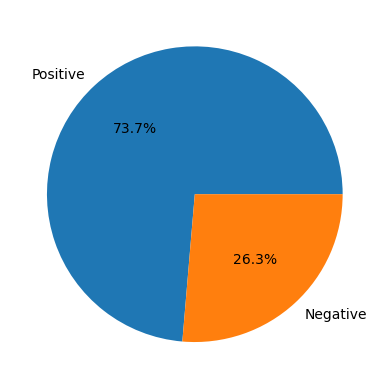

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords

# Load the data
data = pd.read_csv('tripadvisor_hotel_reviews.csv')

# Convert 'Rating' column to integers
data['Rating'] = data['Rating'].astype(int)

# rating 4, 5 => Positive; 1, 2, 3 => Negative
def ratings(rating):
    if rating > 3 and rating <= 5:
        return "Positive"
    if rating > 0 and rating <= 3:
        return "Negative"

data['Rating'] = data['Rating'].apply(ratings)

# Create the pie chart
plt.pie(data['Rating'].value_counts(), labels=data['Rating'].unique().tolist(), autopct='%1.1f%%')

# Save the chart as a PNG file
plt.savefig('pie_chart.png')

# Show the chart
plt.show()


In [18]:
data

,Review,Rating
0,nice hotel expensive parking got good deal sta...,Positive
1,ok nothing special charge diamond member hilto...,Negative
2,nice rooms not 4* experience hotel monaco seat...,Positive
3,"unique, great stay, wonderful time hotel monac...",Positive
4,"great stay great stay, went seahawk game aweso...",Positive
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",Positive
20487,great location price view hotel great quick pl...,Positive
20488,"ok just looks nice modern outside, desk staff ...",Negative
20489,hotel theft ruined vacation hotel opened sept ...,Negative


In [1]:
import pandas as pd
from nltk.corpus import stopwords

# Load the data
data = pd.read_csv('tripadvisor_hotel_reviews.csv')

# Convert 'Rating' column to integers
data['Rating'] = data['Rating'].astype(int)

# rating 4, 5 => Positive; 1, 2, 3 => Negative
def ratings(rating):
    if rating > 3 and rating <= 5:
        return "Positive"
    if rating > 0 and rating <= 3:
        return "Negative"

data['Rating'] = data['Rating'].apply(ratings)

# Filter the data by rating
positive_reviews = data[data['Rating'] == 'Positive']
negative_reviews = data[data['Rating'] == 'Negative']

# Write the positive reviews to a CSV file
positive_reviews.to_csv('positive_reviews.csv', index=False)

# Write the negative reviews to a CSV file
negative_reviews.to_csv('negative_reviews.csv', index=False)


In [40]:
#word count for positive review
import pandas as pd
from collections import Counter
from nltk.corpus import stopwords

data['Review'] = data['Review'].apply(preprocess_signs)
# Filter only positive reviews
positive_reviews = data[data['Rating'] == 'Positive']
# Concatenate all positive review texts into a single string
all_text = ' '.join(positive_reviews['Review'].values)

# Split the text into individual words
words = all_text.split()

# Remove stop words
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]

# Count the frequency of each word
word_counts = Counter(words)

top_words_p = word_counts.most_common(30)
top_words_p

[('hotel', 35998),
 ('room', 22333),
 ('great', 18105),
 ('staff', 12486),
 ('good', 12423),
 ('nt', 12365),
 ('stay', 11163),
 ('nice', 9240),
 ('location', 8704),
 ('rooms', 8282),
 ('stayed', 7867),
 ('clean', 7301),
 ('breakfast', 7220),
 ('time', 6967),
 ('beach', 6837),
 ('service', 6817),
 ('day', 6386),
 ('night', 6185),
 ('food', 6141),
 ('really', 5698),
 ('friendly', 5577),
 ('place', 5546),
 ('excellent', 5390),
 ('like', 5277),
 ('resort', 5265),
 ('pool', 5169),
 ('walk', 4948),
 ('little', 4732),
 ('helpful', 4715),
 ('small', 4587)]

In [20]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


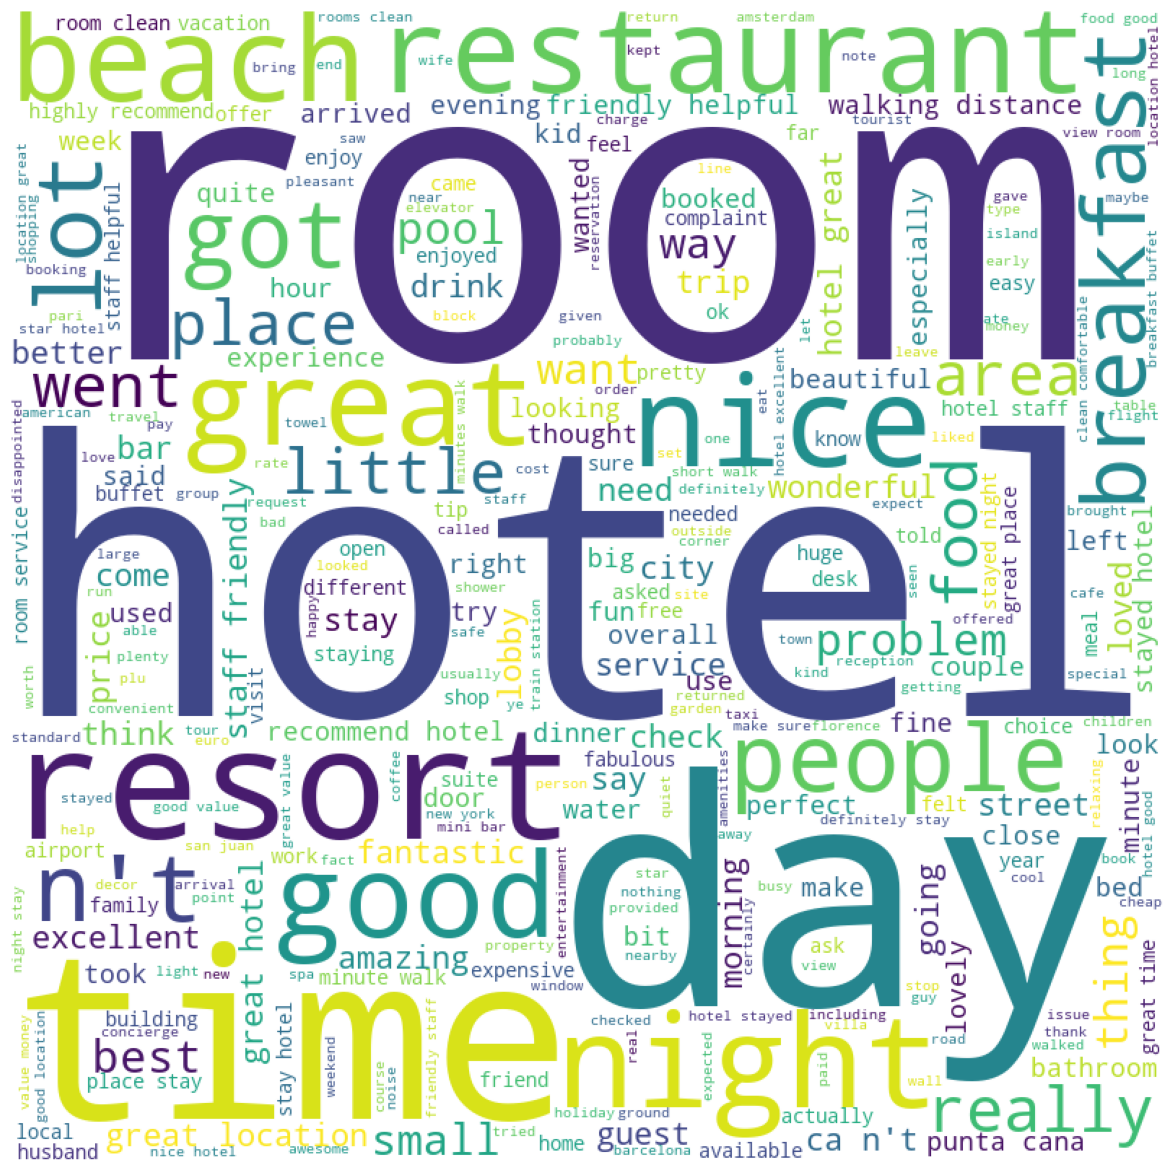

In [21]:
# the highest word repeat in the positive review
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Load the data
data = pd.read_csv('tripadvisor_hotel_reviews.csv')

# Convert 'Rating' column to integers
data['Rating'] = data['Rating'].astype(int)

# rating 4, 5 => Positive; 1, 2, 3 => Negative
def ratings(rating):
    if rating > 3 and rating <= 5:
        return "Positive"
    if rating > 0 and rating <= 3:
        return "Negative"

data['Rating'] = data['Rating'].apply(ratings)

# Filter only positive reviews
positive_reviews = data[data['Rating'] == 'Positive']

# Generate the word cloud for positive reviews
plt.figure(figsize=(15, 15))
top_words_p = WordCloud(max_words=1000, min_font_size=10, 
                        height=800, width=800, background_color="white").generate(' '.join(positive_reviews['Review']))

plt.imshow(top_words_p)
plt.axis("off")
plt.show()

In [22]:
#word count for megative review
import pandas as pd
from collections import Counter
from nltk.corpus import stopwords

data['Review'] = data['Review'].apply(preprocess_signs)
# Filter only positive reviews
negative_reviews = data[data['Rating'] == 'Negative']
# Concatenate all positive review texts into a single string
all_text = ' '.join(negative_reviews['Review'].values)

# Split the text into individual words
words = all_text.split()

# Remove stop words
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]

# Count the frequency of each word
word_counts = Counter(words)

top_words_n= word_counts.most_common(30)
top_words_n

[('hotel', 12834),
 ('room', 11967),
 ('nt', 6624),
 ('good', 4549),
 ('stay', 3990),
 ('rooms', 3733),
 ('staff', 3717),
 ('night', 3239),
 ('nice', 3159),
 ('service', 3144),
 ('great', 2982),
 ('day', 2954),
 ('food', 2849),
 ('time', 2849),
 ('like', 2835),
 ('beach', 2744),
 ('resort', 2649),
 ('stayed', 2599),
 ('location', 2328),
 ('got', 2283),
 ('people', 2231),
 ('place', 2143),
 ('really', 2065),
 ('clean', 2058),
 ('breakfast', 2051),
 ('pool', 1999),
 ('desk', 1938),
 ('small', 1938),
 ('2', 1841),
 ('told', 1752)]

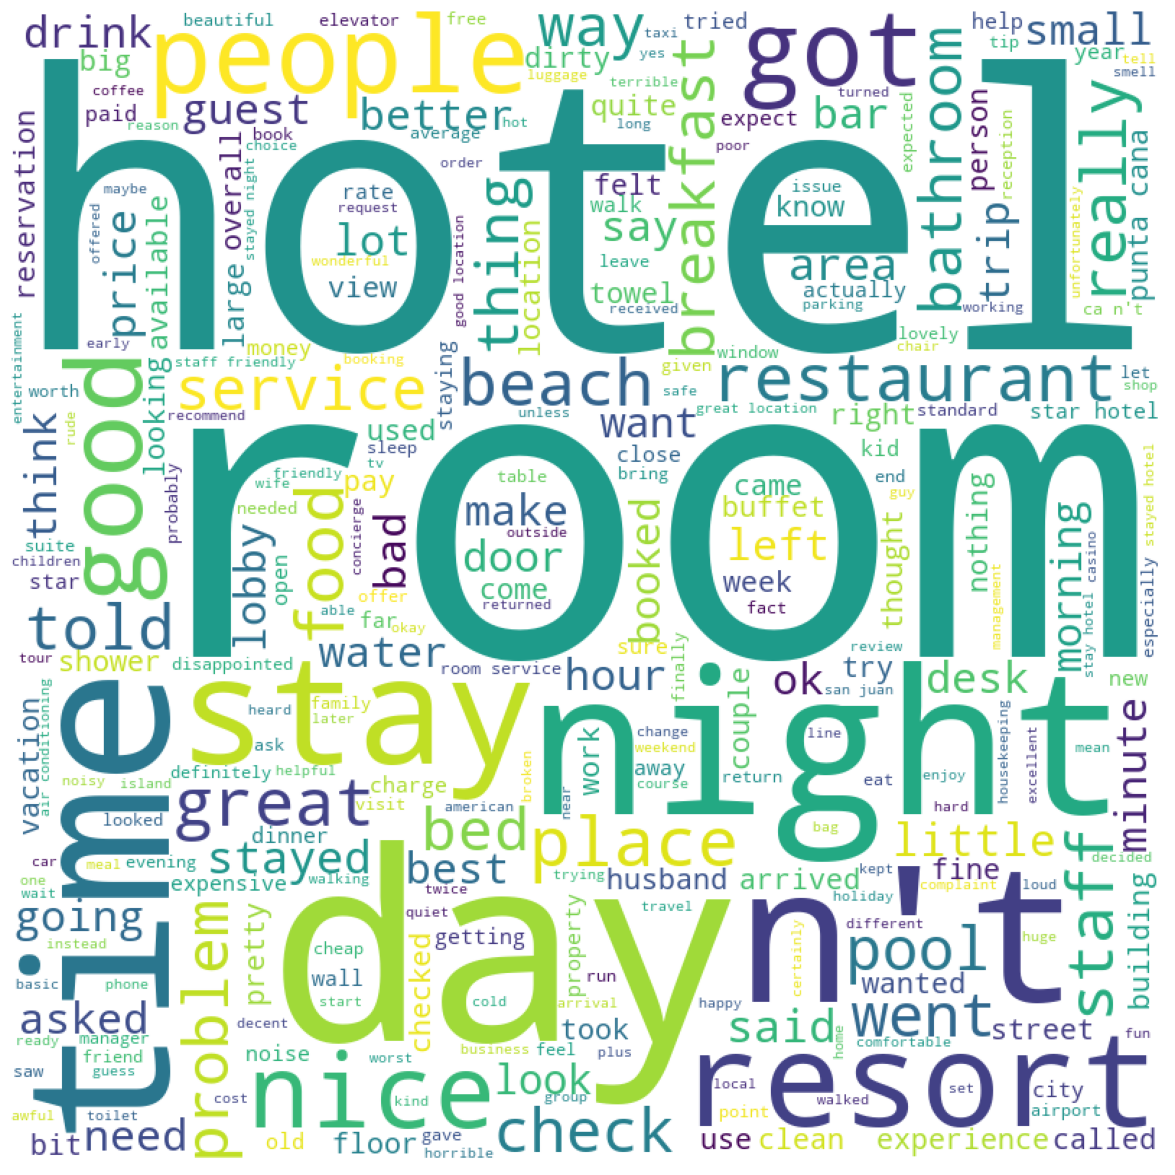

In [23]:
# Generate the word cloud for negative reviews
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Load the data
data = pd.read_csv('tripadvisor_hotel_reviews.csv')

# Convert 'Rating' column to integers
data['Rating'] = data['Rating'].astype(int)

# rating 4, 5 => Positive; 1, 2, 3 => Negative
def ratings(rating):
    if rating > 3 and rating <= 5:
        return "Positive"
    if rating > 0 and rating <= 3:
        return "Negative"

data['Rating'] = data['Rating'].apply(ratings)

# Filter only negative reviews
negative_reviews = data[data['Rating'] == 'Negative']

# Generate the word cloud for negative reviews
plt.figure(figsize=(15, 15))
top_words_n = WordCloud(max_words=1000, min_font_size=10, 
                        height=800, width=800, background_color="white")
.generate(' '.join(negative_reviews['Review']))

plt.imshow(top_words_n)
plt.axis("off")
plt.show()


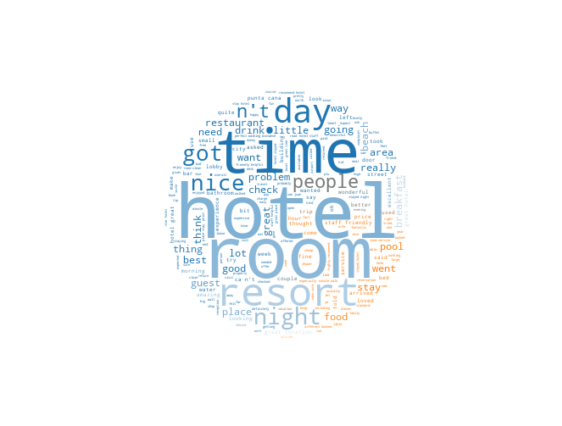

In [57]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Load the data
data = pd.read_csv('tripadvisor_hotel_reviews.csv')

# Convert 'Rating' column to integers
data['Rating'] = data['Rating'].astype(int)

# rating 4, 5 => Positive; 1, 2, 3 => Negative
def ratings(rating):
    if rating > 3 and rating <= 5:
        return "Positive"
    if rating > 0 and rating <= 3:
        return "Negative"

data['Rating'] = data['Rating'].apply(ratings)

# Generate a word cloud image
mask = np.array(Image.open("pie_chart.png"))
wordcloud_ita = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, mask=mask).generate(' '.join(data['Review']))

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_ita.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.show()


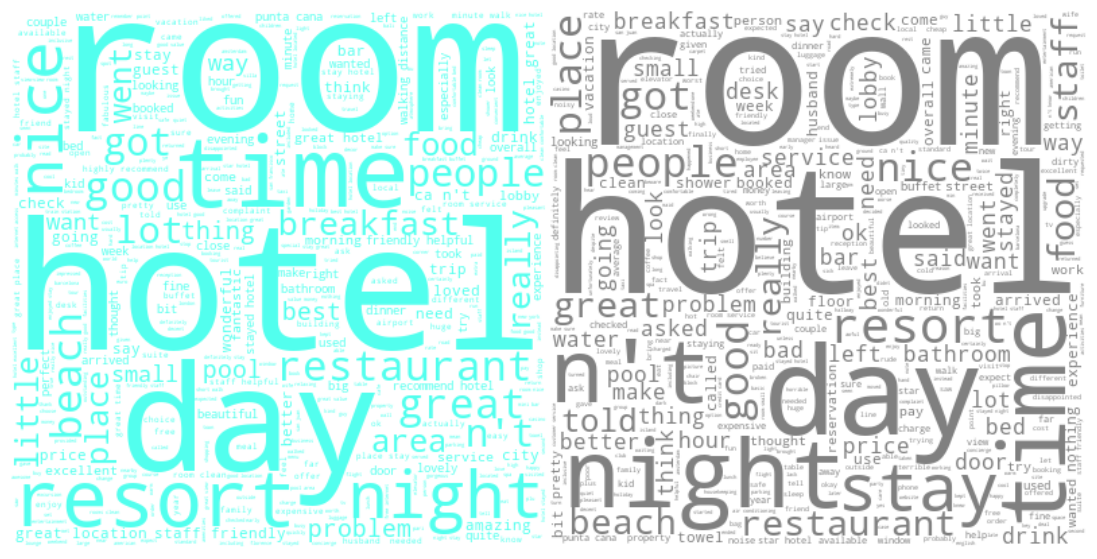

In [61]:
import numpy as np
import pandas as pd
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('tripadvisor_hotel_reviews.csv')

# Convert 'Rating' column to integers
data['Rating'] = data['Rating'].astype(int)

# rating 4, 5 => Positive; 1, 2, 3 => Negative
def ratings(rating):
    if rating > 3 and rating <= 5:
        return "Positive"
    if rating > 0 and rating <= 3:
        return "Negative"

data['Rating'] = data['Rating'].apply(ratings)

positive_reviews = data[data['Rating'] == 'Positive']
negative_reviews = data[data['Rating'] == 'Negative']

stopwords = set(STOPWORDS)

# Define color functions for positive and negative word clouds
def tiffany_blue_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(174, 100%, 66%)"  # Tiffany Blue color in HSL format

def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%, 50%)"  # Grey color in HSL format

# Generate word cloud images for positive and negative reviews
wordcloud_positive = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=400, height=400, color_func=tiffany_blue_color_func).generate(' '.join(positive_reviews['Review']))
wordcloud_negative = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=400, height=400, color_func=grey_color_func).generate(' '.join(negative_reviews['Review']))

# Create a white background image
white_bg = Image.new("RGB", (800, 400), (255, 255, 255))

# Combine positive and negative word cloud images
white_bg.paste(Image.fromarray(wordcloud_positive.to_array()), (0, 0))
white_bg.paste(Image.fromarray(wordcloud_negative.to_array()), (400, 0))

# Show the combined image
plt.figure(figsize=[14,7])
plt.imshow(white_bg, interpolation="bilinear")
plt.axis("off")
plt.show()

Proportions:
Positive    0.736567
Negative    0.263433
Name: Rating, dtype: float64


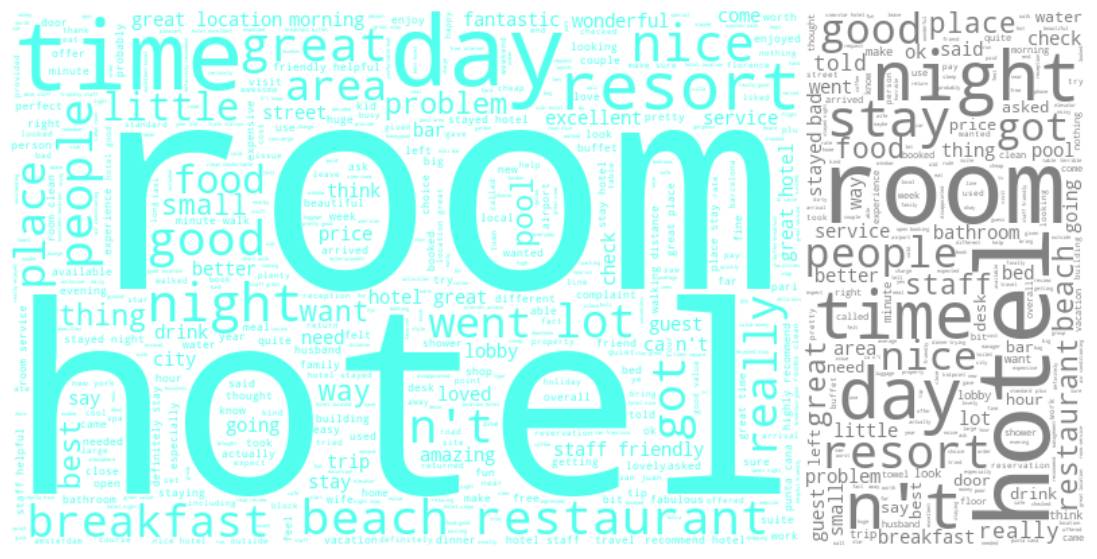

In [62]:
import numpy as np
import pandas as pd
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('tripadvisor_hotel_reviews.csv')

# Convert 'Rating' column to integers
data['Rating'] = data['Rating'].astype(int)

# rating 4, 5 => Positive; 1, 2, 3 => Negative
def ratings(rating):
    if rating > 3 and rating <= 5:
        return "Positive"
    if rating > 0 and rating <= 3:
        return "Negative"

data['Rating'] = data['Rating'].apply(ratings)

# Calculate proportions
rating_proportions = data['Rating'].value_counts(normalize=True)
print("Proportions:")
print(rating_proportions)

positive_reviews = data[data['Rating'] == 'Positive']
negative_reviews = data[data['Rating'] == 'Negative']

stopwords = set(STOPWORDS)

# Define color functions for positive and negative word clouds
def tiffany_blue_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(174, 100%, 66%)"  # Tiffany Blue color in HSL format

def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%, 50%)"  # Grey color in HSL format

total_width = 800
height = 400

positive_width = int(total_width * rating_proportions["Positive"])
negative_width = int(total_width * rating_proportions["Negative"])

# Generate word cloud images for positive and negative reviews
wordcloud_positive = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=positive_width, height=height, color_func=tiffany_blue_color_func).generate(' '.join(positive_reviews['Review']))
wordcloud_negative = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=negative_width, height=height, color_func=grey_color_func).generate(' '.join(negative_reviews['Review']))

# Create a white background image
white_bg = Image.new("RGB", (total_width, height), (255, 255, 255))

# Combine positive and negative word cloud images
white_bg.paste(Image.fromarray(wordcloud_positive.to_array()), (0, 0))
white_bg.paste(Image.fromarray(wordcloud_negative.to_array()), (positive_width, 0))

# Show the combined image
plt.figure(figsize=[14,7])
plt.imshow(white_bg, interpolation="bilinear")
plt.axis("off")
plt.show()
